In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/PRACTICA_9/MODELOS_GENERATIVOS/all_stocks_5yr.csv", index_col="date", parse_dates=True)

In [6]:
data

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...
2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS


In [7]:
data.index

DatetimeIndex(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20',
               '2013-02-21', '2013-02-22',
               ...
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', name='date', length=619040, freq=None)

In [8]:
data_pivot = data.pivot(values="close", columns="Name")

In [9]:
data_pivot

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,72.83,53.88,117.29,167.7800,116.34,99.29,62.18,160.46,199.38,91.65,...,36.79,72.49,89.07,60.73,32.75,74.84,83.98,128.19,54.98,77.82
2018-02-02,71.25,52.10,113.93,160.5000,115.17,96.02,61.69,156.90,195.64,89.11,...,38.25,70.64,84.53,60.06,31.63,75.66,82.63,125.79,54.15,76.78
2018-02-05,68.22,49.76,109.86,156.4900,109.51,91.90,58.73,151.83,190.27,85.40,...,37.68,66.97,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83


In [10]:
columns_notna = data_pivot.columns[data_pivot.isna().sum() == 0]

In [11]:
data_clean = data_pivot[columns_notna]

In [12]:
data_clean

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,72.83,53.88,117.29,167.7800,116.34,99.29,62.18,160.46,199.38,91.65,...,36.79,72.49,89.07,60.73,32.75,74.84,83.98,128.19,54.98,77.82
2018-02-02,71.25,52.10,113.93,160.5000,115.17,96.02,61.69,156.90,195.64,89.11,...,38.25,70.64,84.53,60.06,31.63,75.66,82.63,125.79,54.15,76.78
2018-02-05,68.22,49.76,109.86,156.4900,109.51,91.90,58.73,151.83,190.27,85.40,...,37.68,66.97,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83


In [13]:
data_clean.isna().sum().sum()

0

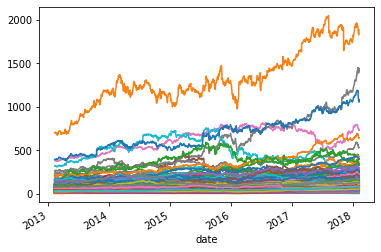

In [14]:
data_clean.plot(legend=False);

In [15]:
# tengo mis datos limpios

In [16]:
datax = np.log(data_clean)
datax = datax.diff()

In [17]:
datax = datax.drop(index=datax.index[0])

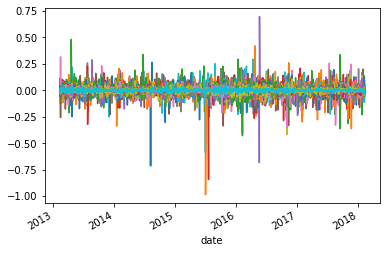

In [18]:
datax.plot(legend=False);

In [19]:
# Hacemos PCA
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=470)

In [21]:
components = pca.fit_transform(X=datax)

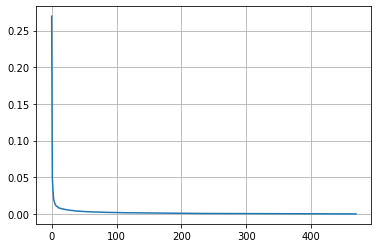

In [22]:
plt.plot(pca.explained_variance_ratio_)
plt.grid()

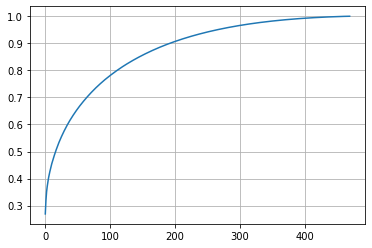

In [23]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()

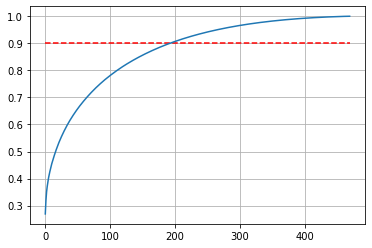

In [24]:
# aplicamos threshold de 90%
plt.plot(np.ones(470)*0.9, "--", c="r")
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()

In [25]:
pca.explained_variance_ratio_.cumsum()[1]

0.31930319485616876

In [26]:
np.argmax(pca.explained_variance_ratio_.cumsum() > 0.9)

192

In [27]:
pca.components_[0]

array([-0.05232729, -0.06186165, -0.04063233, -0.03571688, -0.04426799,
       -0.03117885, -0.04195437, -0.04102843, -0.047447  , -0.0514796 ,
       -0.04417477, -0.03948561, -0.05234323, -0.05956226, -0.01909001,
       -0.01763452, -0.04453116, -0.04095821, -0.03780522, -0.04424965,
       -0.04895044, -0.02683818, -0.0390766 , -0.03516752, -0.05631016,
       -0.05207146, -0.05213661, -0.05341233, -0.03223088, -0.06063033,
       -0.05645073, -0.07126477, -0.04835647, -0.07189058, -0.04974139,
       -0.06675347, -0.03231203, -0.04507903, -0.05577531, -0.04411406,
       -0.03774045, -0.03791058, -0.05263937, -0.06862596, -0.07233256,
       -0.04368479, -0.04413568, -0.02800064, -0.06879084, -0.04502456,
       -0.02284859, -0.06030392, -0.04397272, -0.01694404, -0.04160925,
       -0.05339543, -0.03012542, -0.04443161, -0.06177178, -0.03088524,
       -0.04750409, -0.04940925, -0.03221069, -0.06314231, -0.03103669,
       -0.05670225, -0.05364647, -0.06049054, -0.03820449, -0.03

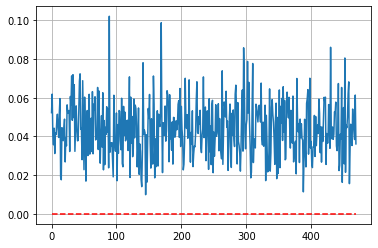

In [28]:
plt.plot(-pca.components_[0])
plt.plot(np.zeros(470), "--", c="r")
plt.grid()

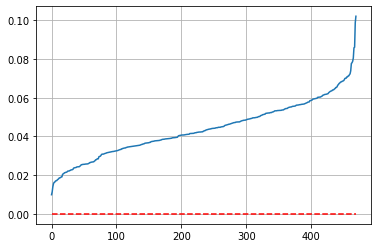

In [29]:
plt.plot(np.sort(-pca.components_[0]))
plt.plot(np.zeros(470), "--", c="r")
plt.grid()

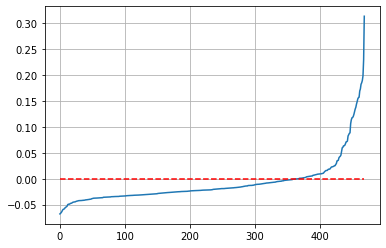

In [30]:
plt.plot(np.sort(-pca.components_[1]))
plt.plot(np.zeros(470), "--", c="r")
plt.grid()

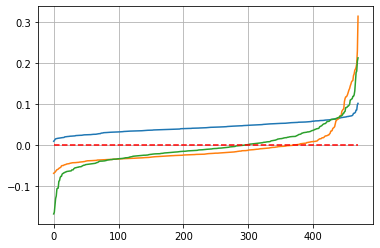

In [31]:
plt.plot(np.sort(-pca.components_[0]))
plt.plot(np.sort(-pca.components_[1]))
plt.plot(np.sort(-pca.components_[3]))

plt.plot(np.zeros(470), "--", c="r")
plt.grid()

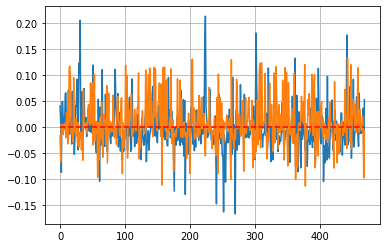

In [32]:
plt.plot(-pca.components_[3])
plt.plot(-pca.components_[2])

plt.plot(np.zeros(470), "--", c="r")
plt.grid()

In [33]:
pca.explained_variance_[0]

0.03289810349866385

In [34]:
np.var(components[:, 0])

0.03287195238300514

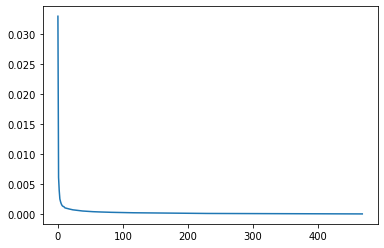

In [35]:
plt.plot(pca.explained_variance_)

In [36]:
# GMM

In [37]:
from sklearn.mixture import GaussianMixture

In [38]:
pca2d = PCA(n_components=2)
components2d = pca2d.fit_transform(datax)

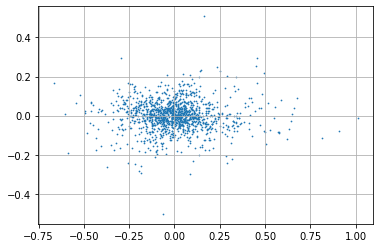

In [39]:
plt.scatter(components2d[:, 0], components2d[:, 1], s=0.5)
plt.grid()

In [40]:
gmm2 = GaussianMixture(n_components=2, covariance_type="diag")
gmm2.fit(components2d)

GaussianMixture(covariance_type='diag', n_components=2)

In [41]:
gmm2.sample()

(array([[-0.0460502 ,  0.08077485]]), array([1]))

In [42]:
# me hago un grid y me ploteo el contour
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-0.75, 0.75, 50)

Xp, Yp = np.meshgrid(xs, ys)
Xf = Xp.flatten()
Yf = Yp.flatten()
points = np.vstack([Xf, Yf])
Z = gmm2.score_samples(points.T)

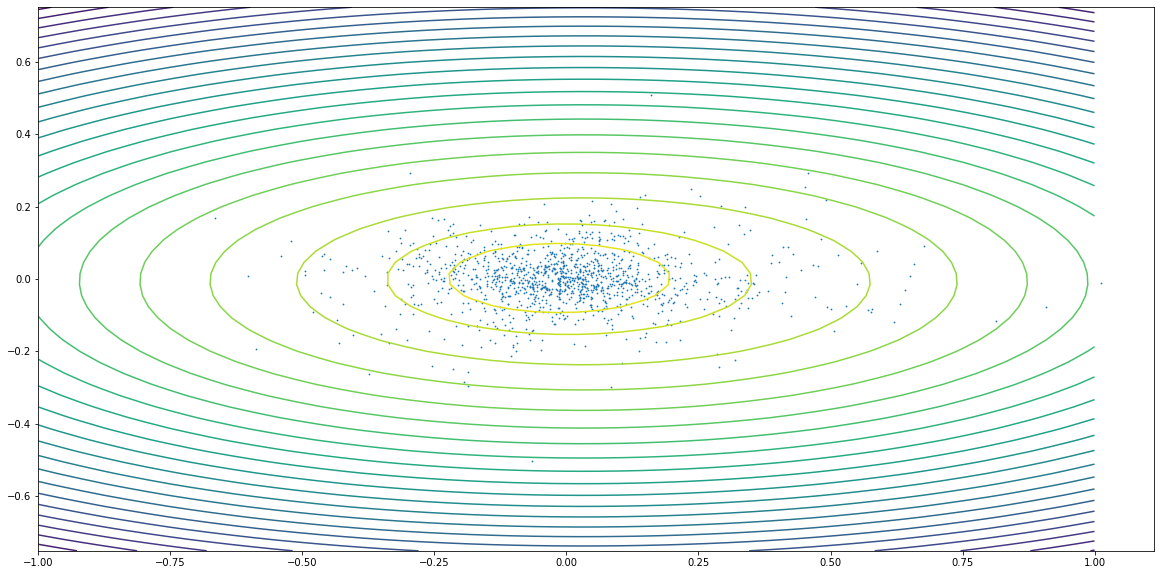

In [43]:
plt.figure(figsize=(20,10))
plt.scatter(components2d[:,0], components2d[:, 1], s=0.6)
plt.contour(Xp, Yp, Z.reshape(50,50), 30)

In [44]:
# cómo evaluo entre modelos?
gmm2.bic(components2d)

-3789.6175933491177

In [45]:
def gridsearchgmm(data, opt_ncomponents, opt_covariance):
    results = []
    for ncomponents in opt_ncomponents:
        for covariance in opt_covariance:
            gmm_trial = GaussianMixture(n_components=ncomponents, covariance_type=covariance)
            gmm_trial.fit(data)
            bic = gmm_trial.bic(data)
            print("ncomponents {}, covariance {}, bic is {}".format(ncomponents, covariance, bic))
            results.append(bic)
    return results

In [46]:
opt_ncomponents = np.arange(1,10)
opt_covariance = ["diag"]
results = gridsearchgmm(components2d, opt_ncomponents, opt_covariance)

ncomponents 1, covariance diag, bic is -3546.150894298419
ncomponents 2, covariance diag, bic is -3789.6175933491177
ncomponents 3, covariance diag, bic is -3755.5708967924083
ncomponents 4, covariance diag, bic is -3718.230254618639
ncomponents 5, covariance diag, bic is -3712.408063405234
ncomponents 6, covariance diag, bic is -3689.9240860580217
ncomponents 7, covariance diag, bic is -3696.762571155283
ncomponents 8, covariance diag, bic is -3658.803697167503
ncomponents 9, covariance diag, bic is -3626.211035672443


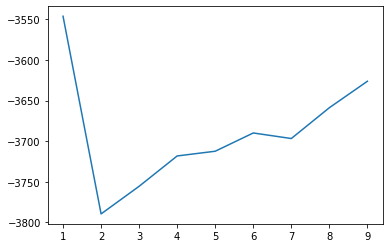

In [47]:
plt.plot(np.arange(1,10),results)

In [48]:
opt_ncomponents = np.arange(1,5)
opt_covariance = ["diag", "spherical", "full"]
results = gridsearchgmm(components2d, opt_ncomponents, opt_covariance)

ncomponents 1, covariance diag, bic is -3546.150894298419
ncomponents 1, covariance spherical, bic is -2747.7213571585116
ncomponents 1, covariance full, bic is -3539.013615861157
ncomponents 2, covariance diag, bic is -3788.5171722257064
ncomponents 2, covariance spherical, bic is -3163.5302922177507
ncomponents 2, covariance full, bic is -3783.3060654161154
ncomponents 3, covariance diag, bic is -3756.9807677167496
ncomponents 3, covariance spherical, bic is -3563.5139044301495
ncomponents 3, covariance full, bic is -3743.02610094834
ncomponents 4, covariance diag, bic is -3719.254799854508
ncomponents 4, covariance spherical, bic is -3647.331597332319
ncomponents 4, covariance full, bic is -3716.637306184332


In [49]:
# esto sirve para detectar anomalías por debajo de un threshold calculado previamente
gmm2.score_samples([[-0.4, -0.5]])

array([-10.59425886])

In [50]:
# ahora lo hacemos con más componentes

In [51]:
pcafull = PCA(n_components=100)
componentsfull = pcafull.fit_transform(datax)

In [52]:
# evaluamos parámetros gmm basados en bic
opt_ncomponents = np.arange(1,10)
opt_covariance = ["diag"]
results = gridsearchgmm(componentsfull, opt_ncomponents, opt_covariance)

ncomponents 1, covariance diag, bic is -599888.0297771276
ncomponents 2, covariance diag, bic is -618090.3990435705
ncomponents 3, covariance diag, bic is -621525.1739869897
ncomponents 4, covariance diag, bic is -621779.9567949446
ncomponents 5, covariance diag, bic is -621302.6587553272
ncomponents 6, covariance diag, bic is -620652.2355920882
ncomponents 7, covariance diag, bic is -619723.1371178372
ncomponents 8, covariance diag, bic is -619192.8677241759
ncomponents 9, covariance diag, bic is -618108.6288601349


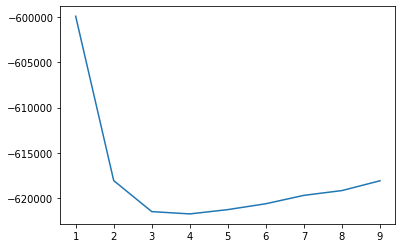

In [53]:
plt.plot(np.arange(1,10), results)

In [54]:
# evaluamos parámetros gmm basados en bic
opt_ncomponents = np.arange(2,6)
opt_covariance = ["diag", "full", "spherical", "tied"]
results = gridsearchgmm(componentsfull, opt_ncomponents, opt_covariance)

ncomponents 2, covariance diag, bic is -618088.9827169783
ncomponents 2, covariance full, bic is -552720.009572175
ncomponents 2, covariance spherical, bic is -545061.4679087176
ncomponents 2, covariance tied, bic is -563971.9434209869
ncomponents 3, covariance diag, bic is -621522.4239507109
ncomponents 3, covariance full, bic is -527104.9372776455
ncomponents 3, covariance spherical, bic is -561812.1801727957
ncomponents 3, covariance tied, bic is -563935.3152919193
ncomponents 4, covariance diag, bic is -621793.1926164734
ncomponents 4, covariance full, bic is -502439.0282448339
ncomponents 4, covariance spherical, bic is -561942.9018372262
ncomponents 4, covariance tied, bic is -563374.4756954985
ncomponents 5, covariance diag, bic is -619968.6657009897
ncomponents 5, covariance full, bic is -477702.5959438938
ncomponents 5, covariance spherical, bic is -573404.9393318482
ncomponents 5, covariance tied, bic is -562632.1384036009


In [55]:
# 4 components con covariance diag es lo mejor

In [56]:
gmmfull = GaussianMixture(n_components=4, covariance_type="diag")
gmmfull.fit(componentsfull)

GaussianMixture(covariance_type='diag', n_components=4)

In [57]:
gmmfull.sample()

(array([[ 3.04557288e-03,  4.01093005e-02,  3.94420813e-02,
          1.24415905e-03,  1.43722107e-02, -1.67370023e-02,
          2.59758800e-02,  2.06098691e-02, -4.38872205e-02,
         -2.32028796e-02,  2.27675943e-02, -1.33674337e-02,
          2.24517075e-02,  7.99458816e-05, -6.41492139e-03,
          5.37138144e-03,  1.26846797e-02,  3.39334811e-03,
         -2.07319616e-02, -3.06467526e-02,  1.20562734e-02,
         -2.41396155e-02, -1.99978075e-02, -5.16949099e-03,
         -1.69771031e-02, -1.00553200e-02, -9.20979912e-03,
          4.20220101e-03, -1.44635064e-02,  2.17639558e-02,
         -3.65711594e-03,  1.50278369e-02, -2.03169104e-02,
          5.19251128e-02,  1.07427056e-02, -2.76818646e-03,
         -1.99170965e-02,  1.27084653e-03,  2.20096509e-02,
         -4.45352833e-05, -3.24403468e-04,  5.04544171e-03,
         -4.43413702e-03,  1.05732476e-02, -1.74103415e-02,
         -3.78969748e-02,  5.90793529e-04,  7.86550327e-03,
         -3.05004882e-03, -1.33018731e-0

In [58]:
# lo aplicamos a los datos para generar series de precios

In [59]:
datax.shape

(1258, 470)

In [60]:
data_clean.values.shape

(1259, 470)

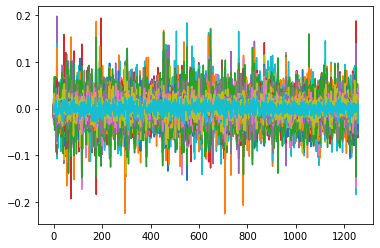

In [61]:
components_generated = np.array([gmmfull.sample()[0][0] for _ in range(1258)])
returns_generated = pcafull.inverse_transform(components_generated)
plt.plot(returns_generated);

In [62]:
prices_generated = np.vstack([np.log(data_clean.values[0:1]), returns_generated]).cumsum(axis=0)
prices_generated = np.exp(prices_generated)

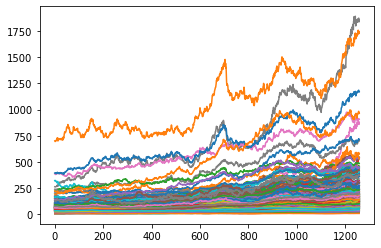

In [63]:
plt.plot(prices_generated);

In [64]:
def generate_prices():
    components_generated = np.array([gmmfull.sample()[0][0] for _ in range(1258)])
    returns_generated = pcafull.inverse_transform(components_generated)
    prices_generated = np.vstack([np.log(data_clean.values[0:1]), returns_generated]).cumsum(axis=0)
    prices_generated = np.exp(prices_generated)
    plt.plot(prices_generated);

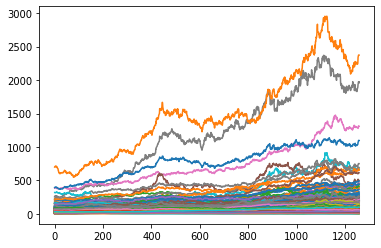

In [65]:
generate_prices()

# Tiene el mercado componentes no lineales en su geometría?

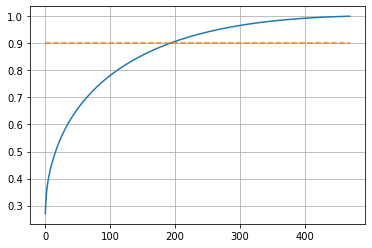

In [66]:
pca = PCA()
components = pca.fit_transform(datax)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.plot(np.ones(470)*0.9, '--')
plt.grid()

In [67]:
# tengo componentsfull y pcafull con 198 para mantener el 90%.

In [68]:
# en colab